In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import plotly

In [3]:
df = pd.read_excel("Pharmacy.xlsx")

In [4]:
print(df.head())

        Date                     Drugs  Amount Payment Method Sales Person
0 2023-12-27        Aspirin, Ibuprofen    1000           Card     Nehemiah
1 2023-12-27                 Vitamin C     950           Card        Alice
2 2023-12-27    Ibuprofen, Doxycycline    1200           Cash       Esther
3 2023-12-27    Doxycycline, Vitamin C    2650           Card       Esther
4 2023-12-29  Aspirin, Calcium Tablets    1850           Card   Nurse Lami


In [5]:
print("\nMissing Values:\n", df.isnull().sum()) #to check for missing values


Missing Values:
 Date              0
Drugs             6
Amount            0
Payment Method    0
Sales Person      0
dtype: int64


In [7]:
df.dropna(subset=['Date', 'Drugs', 'Amount', 'Payment Method', 'Sales Person'], inplace=True)   #drop missing value rows

In [8]:
print("\nCleaned Data Info:\n", df.info()) # clened data

<class 'pandas.core.frame.DataFrame'>
Index: 1407 entries, 0 to 1412
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1407 non-null   datetime64[ns]
 1   Drugs           1407 non-null   object        
 2   Amount          1407 non-null   int64         
 3   Payment Method  1407 non-null   object        
 4   Sales Person    1407 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 66.0+ KB

Cleaned Data Info:
 None


In [9]:
df.to_csv('cleaned_pharmacy_data.csv', index=False) #save as csv file

In [10]:
print("\nDataset Shape:", df.shape)  #let us get a sense of our cleaned dataframe


Dataset Shape: (1407, 5)


In [11]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1407 entries, 0 to 1412
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1407 non-null   datetime64[ns]
 1   Drugs           1407 non-null   object        
 2   Amount          1407 non-null   int64         
 3   Payment Method  1407 non-null   object        
 4   Sales Person    1407 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 66.0+ KB
None


In [12]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                                Date       Amount
count                           1407  1407.000000
mean   2024-06-24 19:07:17.526652416  2277.761194
min              2023-12-27 00:00:00   100.000000
25%              2024-03-25 00:00:00  1300.000000
50%              2024-06-22 00:00:00  2150.000000
75%              2024-09-26 00:00:00  3250.000000
max              2024-12-31 00:00:00  4500.000000
std                              NaN  1180.608930


In [13]:
print("\nUnique Drugs:", df['Drugs'].nunique())
print("Unique Salespersons:", df['Sales Person'].nunique())


Unique Drugs: 315
Unique Salespersons: 6


In [14]:
print("\nTop 10 Most Sold Drugs:")
print(df['Drugs'].value_counts().head(10))  # to get a sense of our top most drugs sold


Top 10 Most Sold Drugs:
Drugs
Doxycycline         61
Vitamin C           58
Omega 3             58
Iron Supplements    58
Calcium Tablets     55
Ciprofloxacin       50
Paracetamol         50
Azithrimycin        45
Amoxicillin         44
ibuprofen           33
Name: count, dtype: int64


C:\Users\tebrick_KING\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tebrick_KING\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


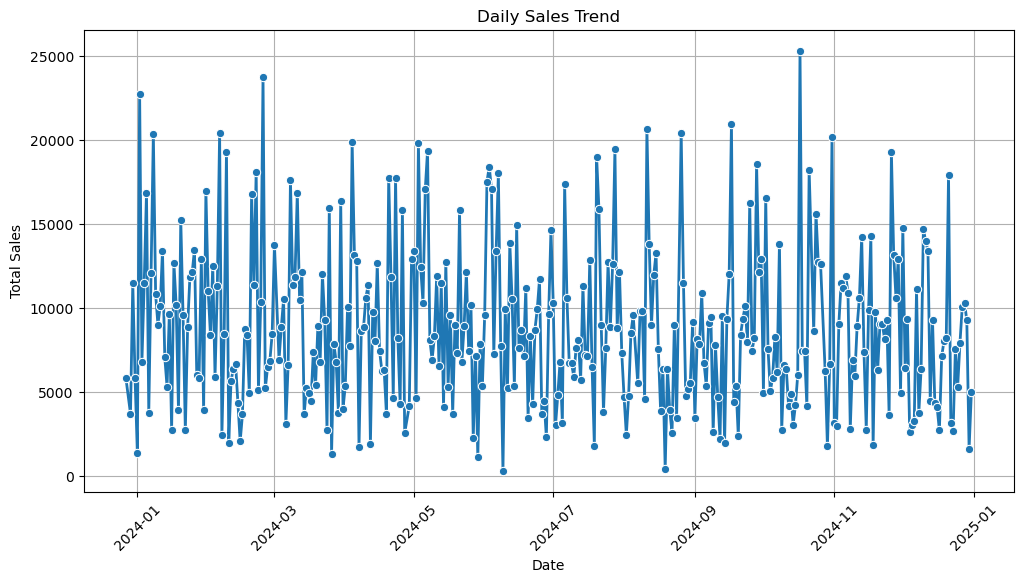

In [15]:
df['Date'] = pd.to_datetime(df['Date'])

daily_sales = df.groupby('Date')['Amount'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Amount', data=daily_sales, marker='o', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Daily Sales Trend')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()   # this would give us an overview and daily trends of sales

In [16]:
# Fisrt question that needs to be answered
start_date = '01/01/2024'  
end_date = '31/12/2024'    

df['Date'] = pd.to_datetime(df['Date'])
filtered_data = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
total_revenue = filtered_data['Amount'].sum()

print(f"Total revenue from {start_date} to {end_date}: ${total_revenue:,.2f}")

Total revenue from 01/01/2024 to 31/12/2024: $3,178,060.00


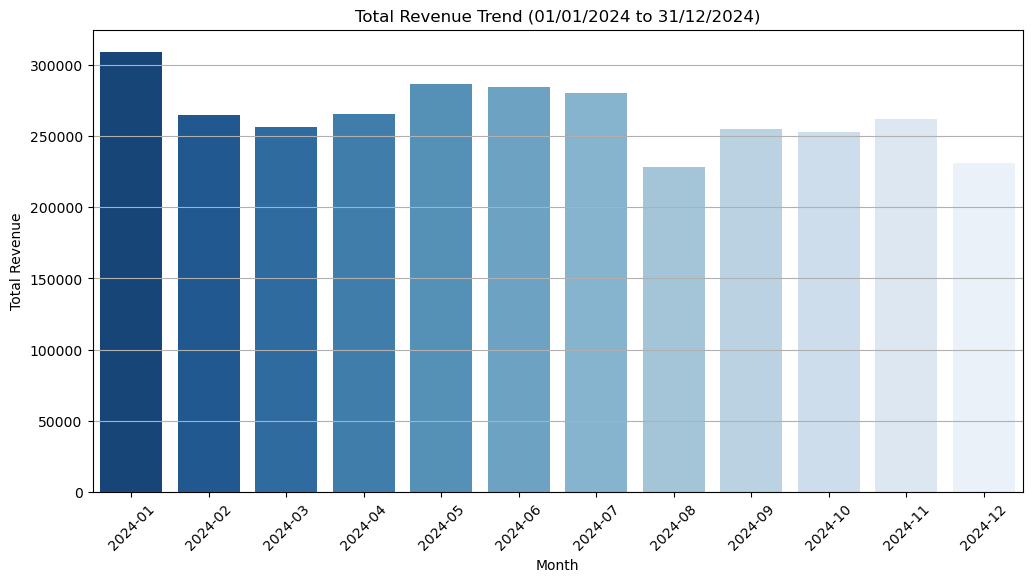

In [17]:
monthly_sales = filtered_data.groupby(filtered_data['Date'].dt.to_period('M'))['Amount'].sum().reset_index()
# Convert period to string for plotting
monthly_sales['Date'] = monthly_sales['Date'].astype(str)
# PLOT
plt.figure(figsize=(12, 6))
sns.barplot(x='Date', y='Amount', data=monthly_sales, palette='Blues_r')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title(f'Total Revenue Trend ({start_date} to {end_date})')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [18]:
drug_revenue = df.groupby('Drugs')['Amount'].sum().reset_index()

# Sort by revenue in descending order
drug_revenue = drug_revenue.sort_values(by='Amount', ascending=False)

print("Top 5 Drugs by Revenue:")
print(drug_revenue.head(5))


Top 5 Drugs by Revenue:
                Drugs  Amount
202           Omega 3  145850
83    Calcium Tablets  145400
185  Iron Supplements  141900
67       Azithrimycin  103250
148       Doxycycline  101100


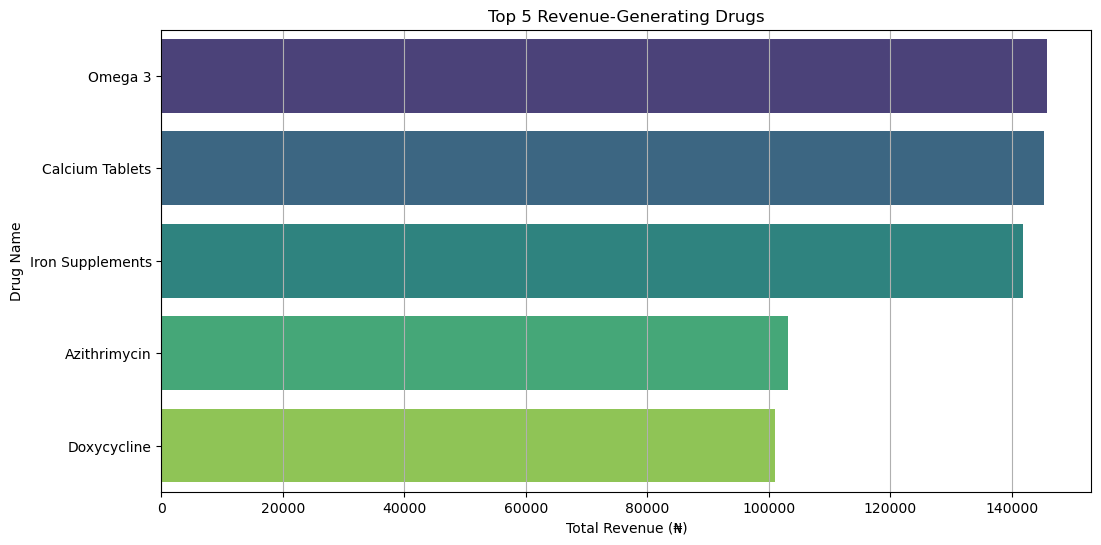

In [20]:
# let us give our result some visuals
top_5_drugs = drug_revenue.head(5)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Amount', y='Drugs', data=top_5_drugs, palette='viridis')
plt.xlabel('Total Revenue (₦)')
plt.ylabel('Drug Name')
plt.title('Top 5 Revenue-Generating Drugs')
plt.grid(axis='x')
plt.show()